<a href="https://colab.research.google.com/github/aasthagarg128/ML_Learn/blob/main/ML_UseCase3_Spam_Mail_Prediction_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

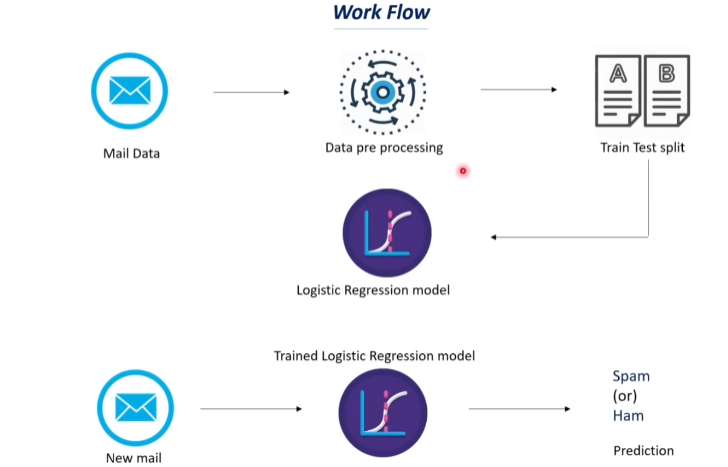

In [ ]:
# Importing the Dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection and Pre-processing

In [ ]:
raw_mail_data = pd.read_csv('/content/mail_data.csv')

In [ ]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
# replacing the null values with a null string

mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [ ]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
mail_data.shape

(5572, 2)

In [ ]:
mail_data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
mail_data['Category'].value_counts()

,count
Category,
ham,4825
spam,747


  Label Encoding

In [ ]:
# label---  spam mail as 0 ;     ham mail as 0;
mail_data.loc[mail_data['Category']=='spam' , 'Category',]= 0    # The second argument 'Category' specifies that we want to modify values in that column.
mail_data.loc[mail_data['Category']=='ham', 'Category',] = 1

In [ ]:
# Separating the dataas text and labels
X = mail_data['Message']    # X = mail_data.drop(columns='Category' ,axis=1)
Y = mail_data['Category']

In [ ]:
print(X)
print(Y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object
0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=3)

In [ ]:
print(X.shape, X_train.shape,X_test.shape)

(5572,) (4457,) (1115,)


Feature Extraction

In [ ]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)
# If set to a higher number (e.g., min_df=5), it would ignore words that appear in fewer than 5 documents.
# Converts all text to lowercase, ensuring words like "Email" and "email" are treated the same.


X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [ ]:
print(X_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34775 stored elements and shape (4457, 7431)>
  Coords	Values
  (0, 2329)	0.38783870336935383
  (0, 3811)	0.34780165336891333
  (0, 2224)	0.413103377943378
  (0, 4456)	0.4168658090846482
  (0, 5413)	0.6198254967574347
  (1, 3811)	0.17419952275504033
  (1, 3046)	0.2503712792613518
  (1, 1991)	0.33036995955537024
  (1, 2956)	0.33036995955537024
  (1, 2758)	0.3226407885943799
  (1, 1839)	0.2784903590561455
  (1, 918)	0.22871581159877646
  (1, 2746)	0.3398297002864083
  (1, 2957)	0.3398297002864083
  (1, 3325)	0.31610586766078863
  (1, 3185)	0.29694482957694585
  (1, 4080)	0.18880584110891163
  (2, 6601)	0.6056811524587518
  (2, 2404)	0.45287711070606745
  (2, 3156)	0.4107239318312698
  (2, 407)	0.509272536051008
  (3, 7414)	0.8100020912469564
  (3, 2870)	0.5864269879324768
  (4, 2870)	0.41872147309323743
  (4, 487)	0.2899118421746198
  :	:
  (4454, 2855)	0.47210665083641806
  (4454, 2246)	0.47210665083641806
  (4455, 4456)	0.24

Trainingthe Model

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
# training the logistic Regression model with the training data
model.fit(X_train_features, Y_train)


LogisticRegression()

### **Breaking It Down 📌**  

#### 🟢 **`X_train_features` (Feature Matrix)**
- 📊 **This is the TF-IDF matrix (numerical representation of text data).** (numerical representation of text data).  
- 🔢 **Contains word frequency & importance scores** for each email.  
- 📏 **Shape:** `(num_samples, num_features)`, e.g., **(4000, 5000)** → (4000 emails, 5000 unique words).  

#### 🔴 **`Y_train` (Target Labels)**
- 🎯 **This is the target variable (labels).** for classification.  
- 📩 **Contains:** `0` for **spam** ✉️, `1` for **ham** 📧.  
- 📏 **Shape:** `(num_samples,)`, e.g., **(4000,)** → (4000 labels).  

🔥 Now, the model learns from `X_train_features` to predict `Y_train` (Spam or Ham)! 🚀✨

Evaluating the trained model

In [ ]:
# predicting on the  trained data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train,prediction_on_training_data)

In [ ]:
print('Accuracy on the trained data: ',accuracy_on_training_data )

Accuracy on the trained data:  0.9676912721561588


In [ ]:
# predicting on the  test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test,prediction_on_test_data)

In [ ]:
print('Accuracy on the test data: ',accuracy_on_test_data )

Accuracy on the test data:  0.9668161434977578


Building Predictive System

In [ ]:
input_mail = ["I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."]

# convert text to feature vector
input_data_features = feature_extraction.transform(input_mail)

#making prediction
prediction = model.predict(input_data_features)

print(prediction)

[1]
